In [1]:
"""
Main driver file for training the model
"""

# Imports
import warnings
warnings.filterwarnings('ignore')

# ML Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Utility Libraries
import os
import math
import plotly
import pickle
import sklearn
import matplotlib

# Checking versions of libraries
print(f"Numpy version : Numpy {np.__version__}")
print(f"Pandas version : Pandas {pd.__version__}")
print(f"Matplotlib version : Matplotlib {matplotlib.__version__}")
print(f"Seaborn version : Seaborn {sns.__version__}")
print(f"SkLearn version : SkLearn {sklearn.__version__}")
print(f"Plotly version : plotly {plotly.__version__}")

# Setting some defaults
%matplotlib inline
sns.set(style='darkgrid', palette='colorblind')

Numpy version : Numpy 1.26.1
Pandas version : Pandas 2.1.2
Matplotlib version : Matplotlib 3.8.1
Seaborn version : Seaborn 0.13.0
SkLearn version : SkLearn 1.3.2
Plotly version : plotly 5.18.0


In [2]:
# Reading the data
df = pd.read_csv('./creditcard.csv', encoding='latin-1')

In [3]:
# Converting the columns to lower case for better readability
df.columns = df.columns.str.lower()

In [4]:
df.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.tail()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
# Setting some custom values
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [7]:
df.head(11)

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    284807 non-null  float64
 1   v1      284807 non-null  float64
 2   v2      284807 non-null  float64
 3   v3      284807 non-null  float64
 4   v4      284807 non-null  float64
 5   v5      284807 non-null  float64
 6   v6      284807 non-null  float64
 7   v7      284807 non-null  float64
 8   v8      284807 non-null  float64
 9   v9      284807 non-null  float64
 10  v10     284807 non-null  float64
 11  v11     284807 non-null  float64
 12  v12     284807 non-null  float64
 13  v13     284807 non-null  float64
 14  v14     284807 non-null  float64
 15  v15     284807 non-null  float64
 16  v16     284807 non-null  float64
 17  v17     284807 non-null  float64
 18  v18     284807 non-null  float64
 19  v19     284807 non-null  float64
 20  v20     284807 non-null  float64
 21  v21     28

In [9]:
# Counting the unique values of label
print(df['class'].value_counts())
print('\n')
print(df['class'].value_counts(normalize=True))

class
0    284315
1       492
Name: count, dtype: int64


class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


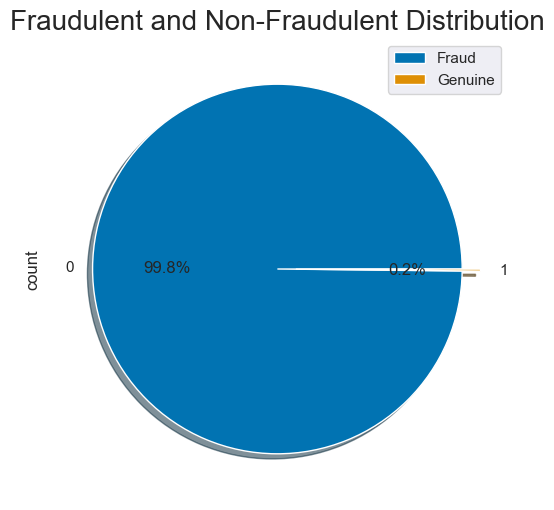

In [10]:
# Displaying the transaction distribution
df["class"].value_counts().plot(kind='pie', explode=[0, 0.1],
                                figsize=(6, 6), autopct='%1.1f%%', shadow=True)

plt.title("Fraudulent and Non-Fraudulent Distribution", fontsize=20)

plt.legend(["Fraud", "Genuine"])

plt.show()

In [11]:
df[['time', 'amount']].describe()

,time,amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


In [12]:
# Dealing with missing data (Error Handling)
df.isnull().sum().max()

0

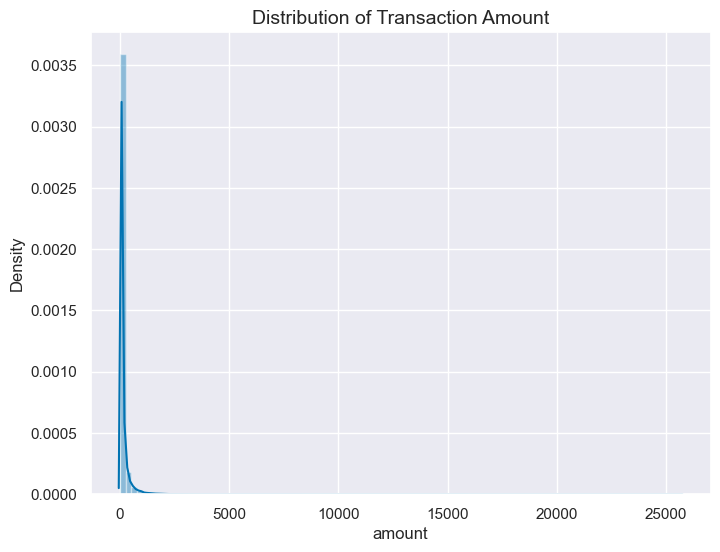

In [13]:
# Checking the distibution
plt.figure(figsize=(8, 6))
plt.title('Distribution of Transaction Amount', fontsize=14)
sns.distplot(df['amount'], bins=100)
plt.show()

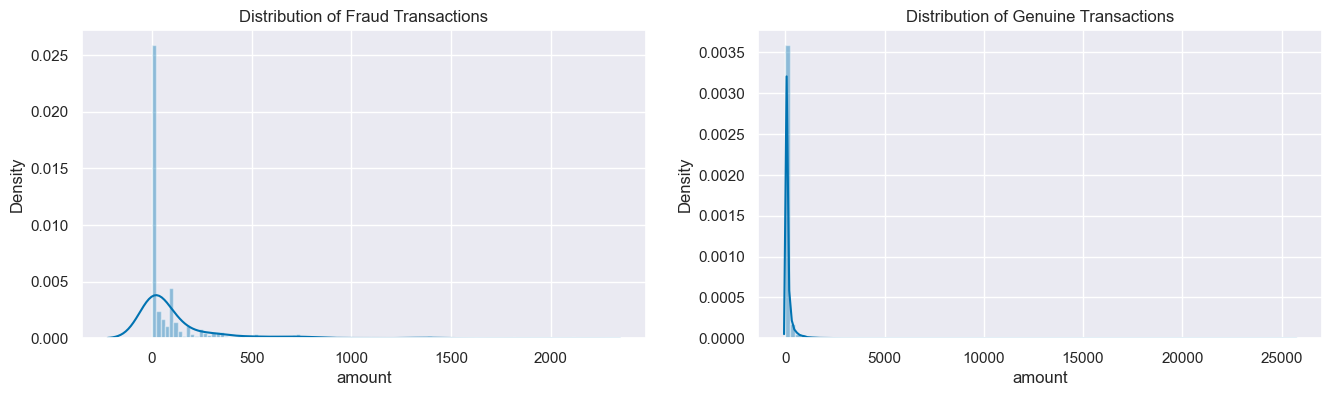

In [14]:
# Checking the distributions for genuine or fraudulent transactions
fig, axs = plt.subplots(ncols=2, figsize=(16, 4))
sns.distplot(df[df['class'] == 1]['amount'], bins=100, ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(df[df['class'] == 0]['amount'], bins=100, ax=axs[1])
axs[1].set_title("Distribution of Genuine Transactions")

plt.show()

In [15]:
# Distribution of Fraud Transactions
print("Fraud Transaction distribution : \n",
      df[(df['class'] == 1)]['amount'].value_counts().head())

print("\n")

print("Maximum amount of fraud transaction - ",
      df[(df['class'] == 1)]['amount'].max())

print("Minimum amount of fraud transaction - ",
      df[(df['class'] == 1)]['amount'].min())

Fraud Transaction distribution : 
 amount
1.00     113
0.00      27
99.99     27
0.76      17
0.77      10
Name: count, dtype: int64


Maximum amount of fraud transaction -  2125.87
Minimum amount of fraud transaction -  0.0


In [16]:
# Distribution of Genuine Transactions
print("Genuine Transaction distribution : \n",
      df[(df['class'] == 0)]['amount'].value_counts().head())


print("\n")


print("Maximum amount of Genuine transaction - ",
      df[(df['class'] == 0)]['amount'].max())


print("Minimum amount of Genuine transaction - ",
      df[(df['class'] == 0)]['amount'].min())

Genuine Transaction distribution : 
 amount
1.00     13575
1.98      6044
0.89      4872
9.99      4746
15.00     3280
Name: count, dtype: int64


Maximum amount of Genuine transaction -  25691.16
Minimum amount of Genuine transaction -  0.0


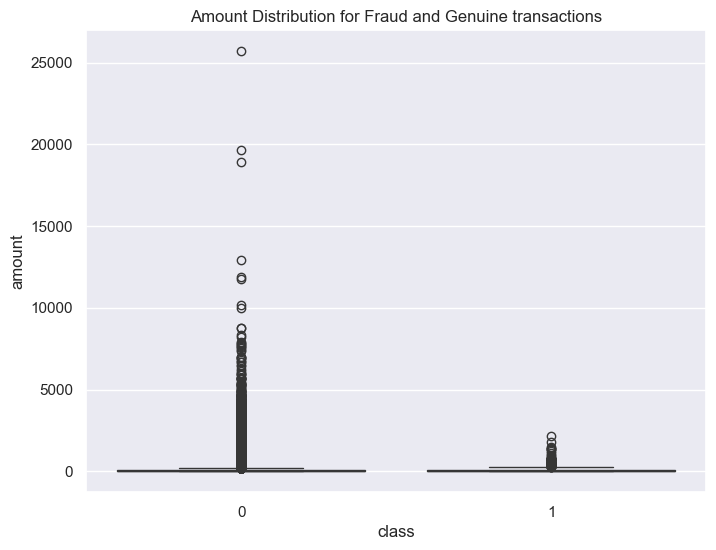

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='class', y='amount', data=df)
plt.title('Amount Distribution for Fraud and Genuine transactions')
plt.show()

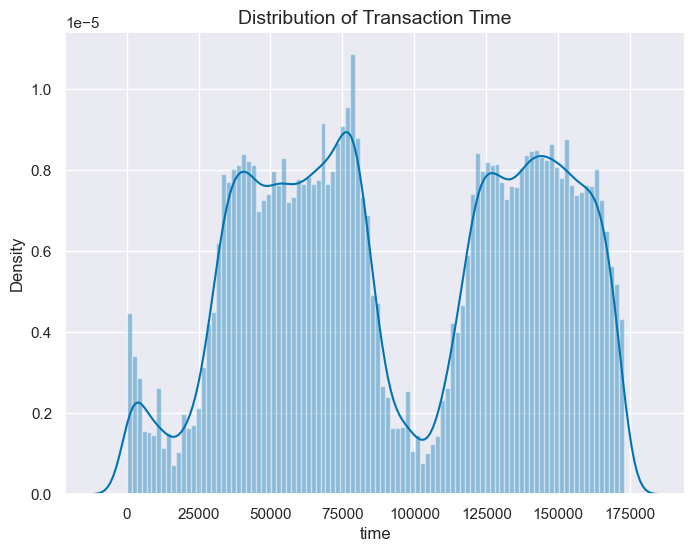

In [18]:
# Checking the distribution of time

plt.figure(figsize=(8, 6))
plt.title('Distribution of Transaction Time', fontsize=14)
sns.distplot(df['time'], bins=100)
plt.show()

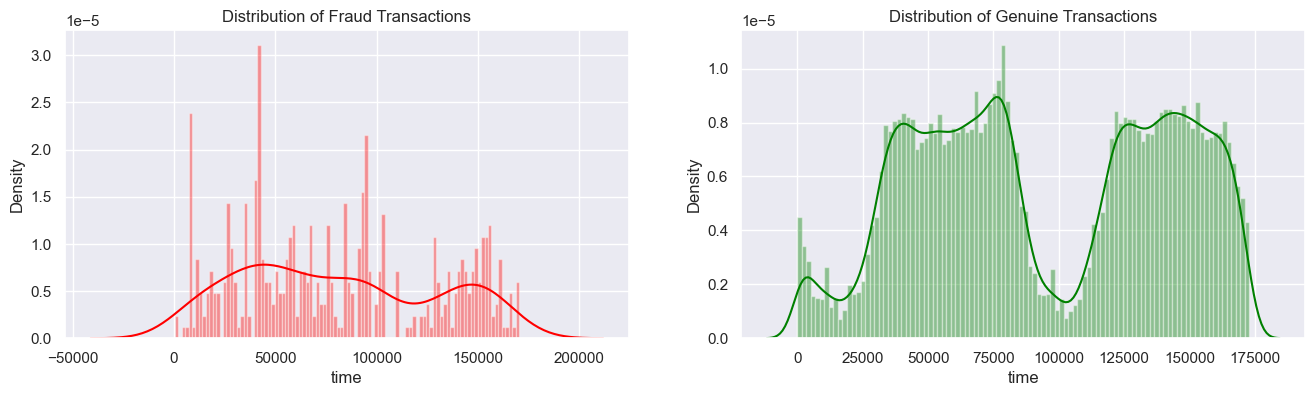

In [19]:
fig, axs = plt.subplots(ncols=2, figsize=(16, 4))

sns.distplot(df[(df['class'] == 1)]['time'], bins=100, color='red', ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(df[(df['class'] == 0)]['time'],
             bins=100, color='green', ax=axs[1])
axs[1].set_title("Distribution of Genuine Transactions")

plt.show()

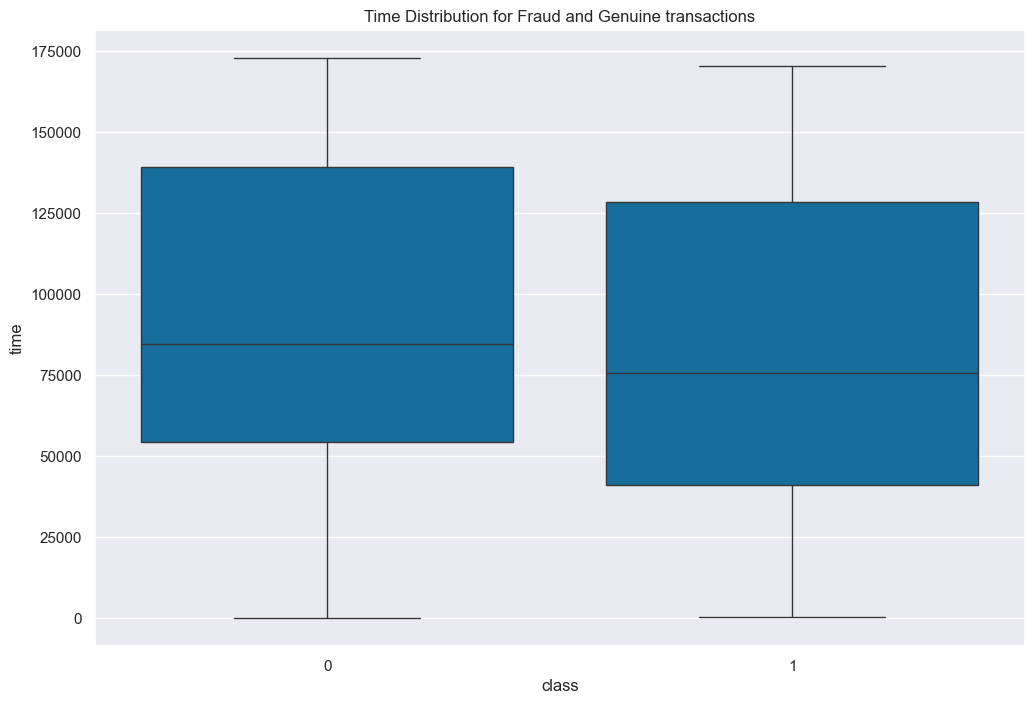

In [20]:
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='class', y='time', data=df)

plt.title('Time Distribution for Fraud and Genuine transactions')
plt.show()

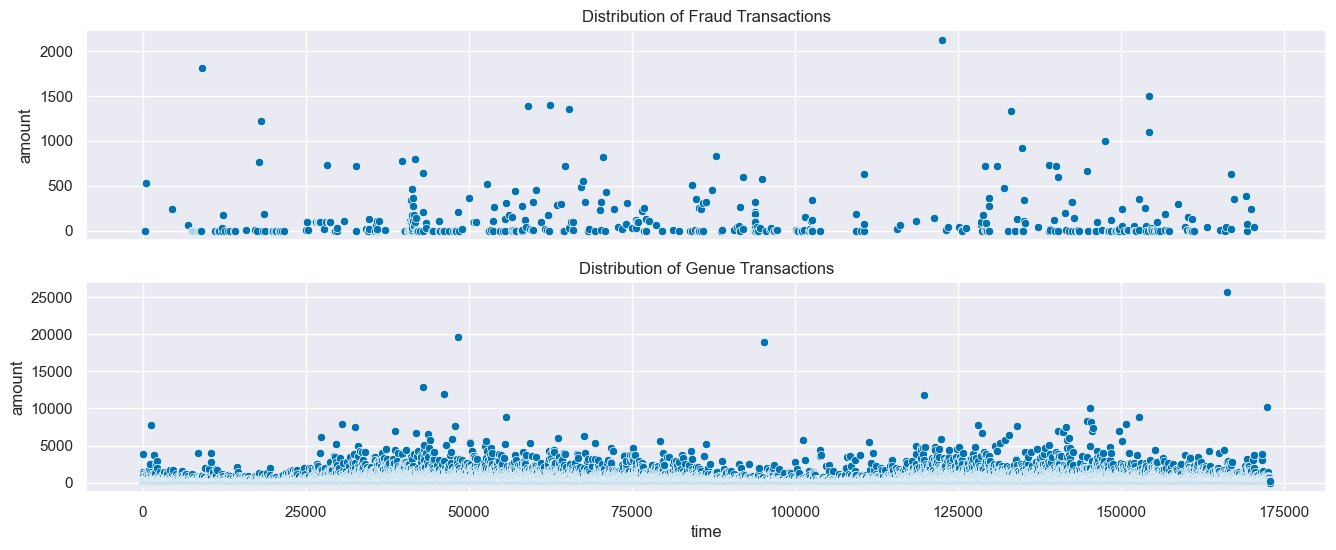

In [21]:
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(16, 6))

sns.scatterplot(x='time', y='amount', data=df[df['class'] == 1], ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.scatterplot(x='time', y='amount', data=df[df['class'] == 0], ax=axs[1])
axs[1].set_title("Distribution of Genue Transactions")

plt.show()

In [22]:
# Finding unique values for each column
df[['time', 'amount', 'class']].nunique()

time      124592
amount     32767
class          2
dtype: int64

In [23]:
# Checking for co-relation between features with a price
df[['time', 'amount', 'class']].corr(
)['class'].sort_values(ascending=False).head(10)

class     1.000000
amount    0.005632
time     -0.012323
Name: class, dtype: float64

<Axes: title={'center': 'Pearson Correlation Matrix'}>

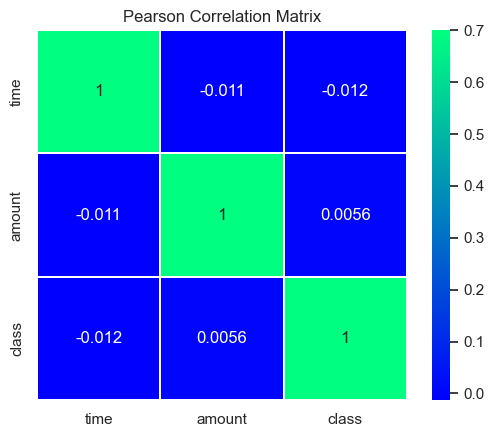

In [24]:
plt.title('Pearson Correlation Matrix')
sns.heatmap(df[['time', 'amount', 'class']].corr(), linewidths=0.25,
            vmax=0.7, square=True, cmap="winter", linecolor='w', annot=True)
# no features are currently highly corelated to other features

In [25]:
# Cleaning the data
df.shape

(284807, 31)

In [26]:
df['class'].value_counts(normalize=True)

class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

In [27]:
# Converting time from second to hour
df['time'] = df['time'].apply(lambda sec: (sec/3600))

In [28]:
# Calculating hour of the day
df['hour'] = df['time'] % 24   # 2 days of data
df['hour'] = df['hour'].apply(lambda x: math.floor(x))

In [29]:
# Calculating First and Second day
df['day'] = df['time']/24   # 2 days of data
df['day'] = df['day'].apply(lambda x: 1 if (x == 0) else math.ceil(x))

In [30]:
# Feature engineering on time
df[['time', 'hour', 'day', 'amount', 'class']]

,time,hour,day,amount,class
0,0.000000,0,1,149.62,0
1,0.000000,0,1,2.69,0
2,0.000278,0,1,378.66,0
3,0.000278,0,1,123.50,0
4,0.000556,0,1,69.99,0
...,...,...,...,...,...
284802,47.996111,23,2,0.77,0
284803,47.996389,23,2,24.79,0
284804,47.996667,23,2,67.88,0
284805,47.996667,23,2,10.00,0


In [31]:
# calculating fraud transaction daywise
dayFrdTran = df[(df['class'] == 1)]['day'].value_counts()

# calculating genuine transaction daywise
dayGenuTran = df[(df['class'] == 0)]['day'].value_counts()

# calculating total transaction daywise
dayTran = df['day'].value_counts()

print("No of transaction Day wise:")
print(dayTran)

print("\n")

print("No of fraud transaction Day wise:")
print(dayFrdTran)

print("\n")

print("No of genuine transactions Day wise:")
print(dayGenuTran)

print("\n")

print("Percentage of fraud transactions Day wise:")
print((dayFrdTran/dayTran)*100)

print("Percentage of genuine transactions Day wise:")
print((dayGenuTran/dayTran)*100)

No of transaction Day wise:
day
1    144787
2    140020
Name: count, dtype: int64


No of fraud transaction Day wise:
day
1    281
2    211
Name: count, dtype: int64


No of genuine transactions Day wise:
day
1    144506
2    139809
Name: count, dtype: int64


Percentage of fraud transactions Day wise:
day
1    0.194078
2    0.150693
Name: count, dtype: float64
Percentage of genuine transactions Day wise:
day
1    99.805922
2    99.849307
Name: count, dtype: float64


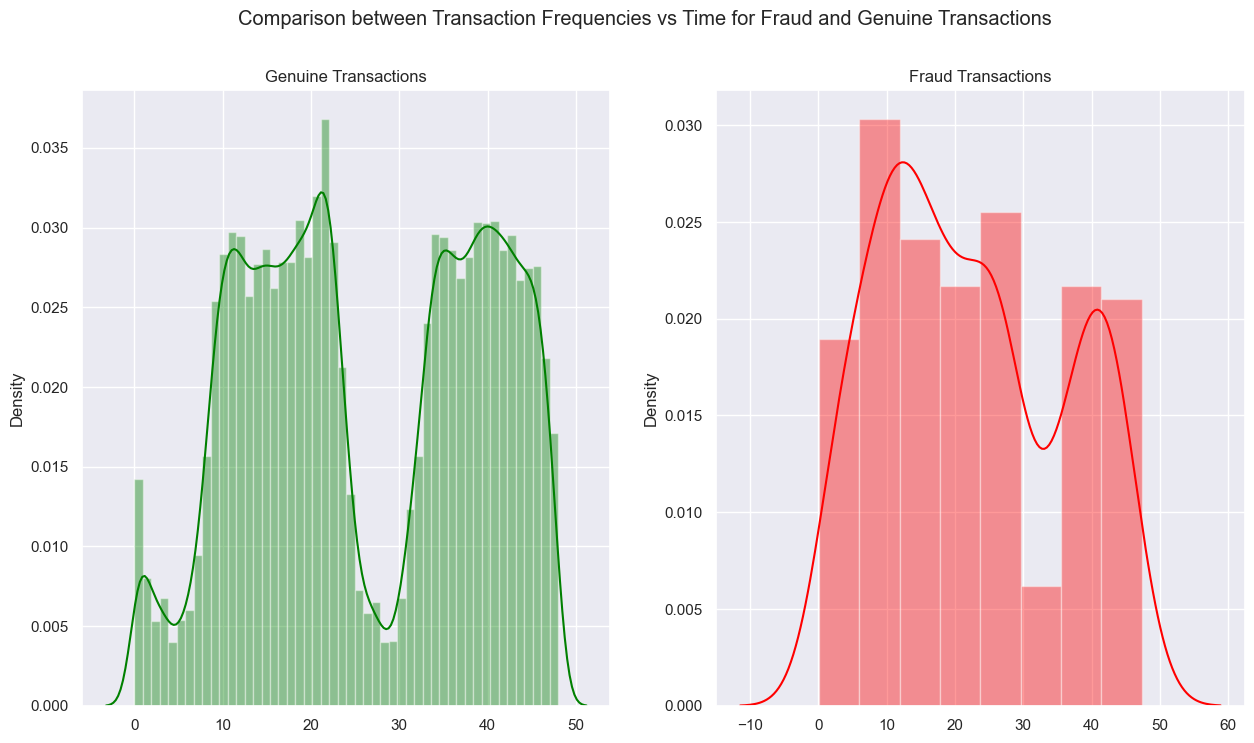

In [32]:
# Time plots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

sns.distplot(df[df['class'] == 0]['time'].values, color='green', ax=axs[0])
axs[0].set_title('Genuine Transactions')

sns.distplot(df[df['class'] == 1]['time'].values, color='red', ax=axs[1])
axs[1].set_title('Fraud Transactions')

fig.suptitle(
    'Comparison between Transaction Frequencies vs Time for Fraud and Genuine Transactions')
plt.show()

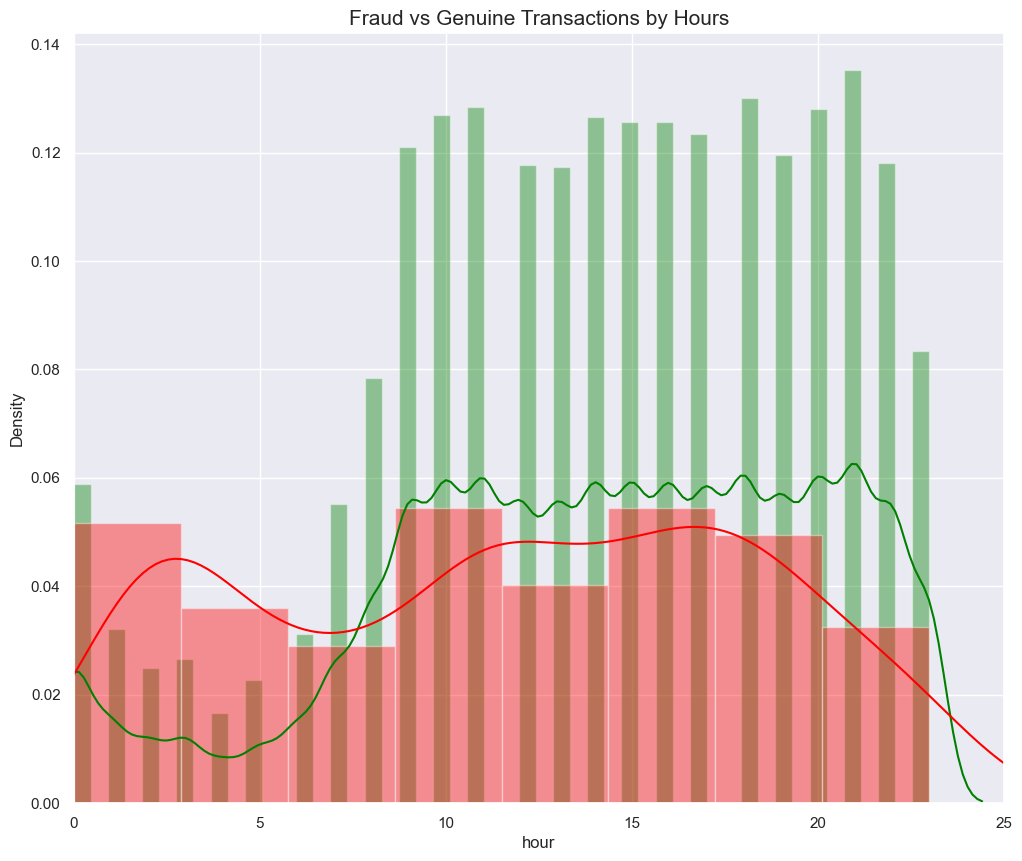

In [33]:
# Finding any particular pattern between time ( in hours ) and Fraud vs Genuine Transactions

plt.figure(figsize=(12, 10))

sns.distplot(df[df['class'] == 0]["hour"], color='green')  # Genuine - green
sns.distplot(df[df['class'] == 1]["hour"], color='red')  # Fraudulent - Red

plt.title('Fraud vs Genuine Transactions by Hours', fontsize=15)
plt.xlim([0, 25])
plt.show()

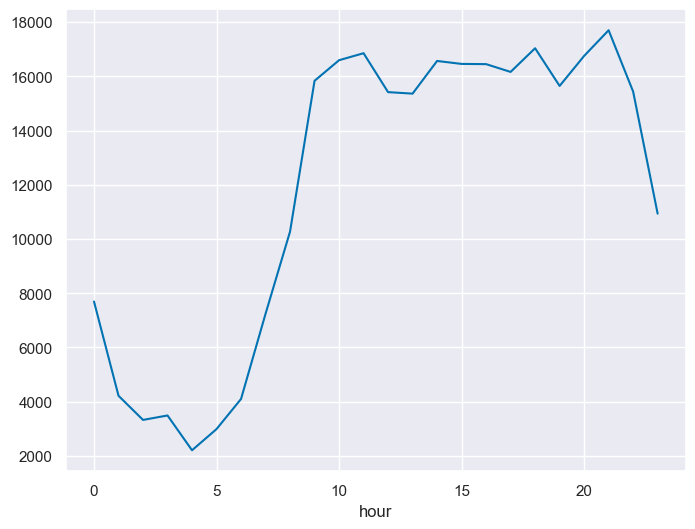

In [34]:
plt.figure(figsize=(8, 6))
df[['time', 'hour', 'day', 'amount', 'class']].groupby('hour').count()[
    'class'].plot()
plt.show()

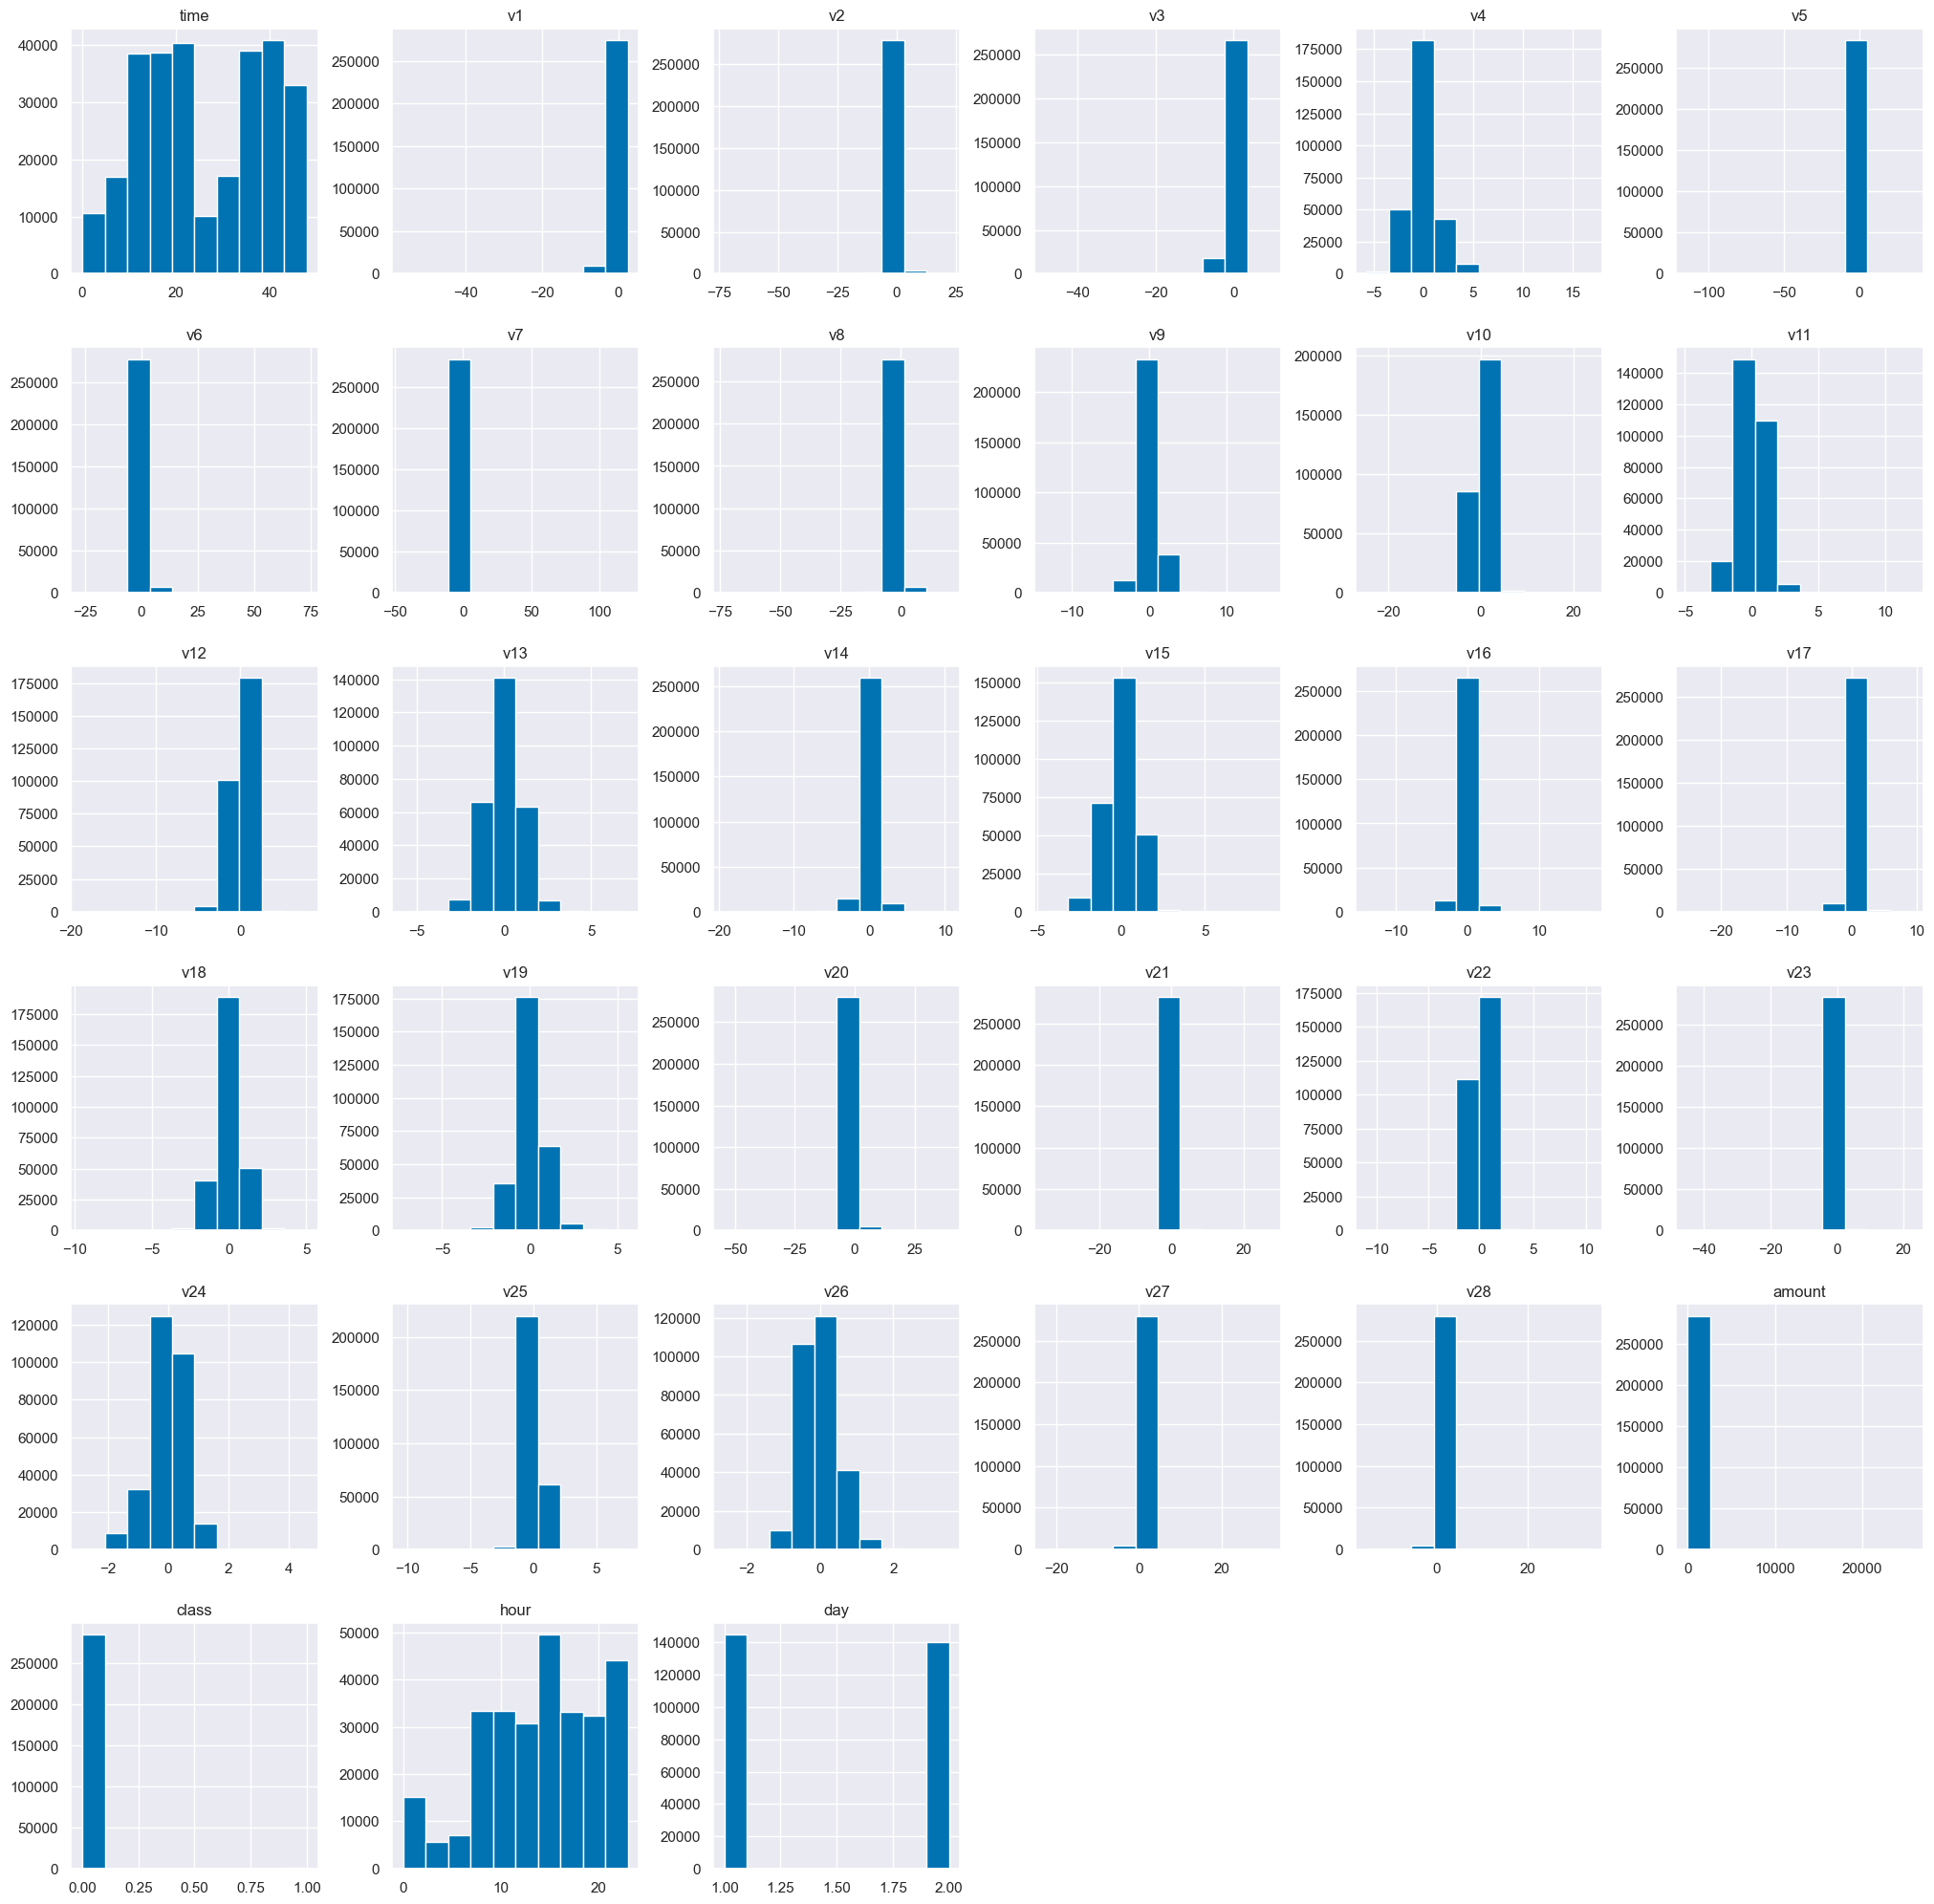

In [35]:
df.hist(figsize=(25, 25))
plt.show()

In [36]:
df.reset_index(inplace=True, drop=True)

In [38]:
# Scale amount by log
# Adding a small amount of 0.0001 to amount as log of zero is infinite.
df['amount_log'] = np.log(df.amount + 0.0001)

In [39]:
# importing a class from a module of a library
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()  # object of the class StandardScaler ()
df['amount_scaled'] = ss.fit_transform(df['amount'].values.reshape(-1, 1))

In [40]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()  # object of the class StandardScaler ()
df['amount_minmax'] = mm.fit_transform(df['amount'].values.reshape(-1, 1))

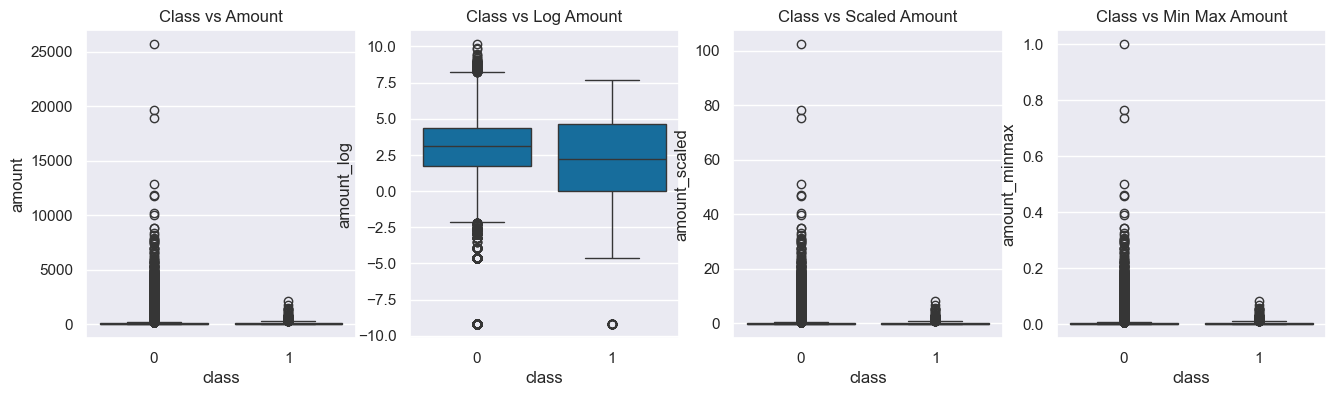

In [41]:
# Feature engineering to a better visualization of the values

# Let's explore the Amount by Class and see the distribuition of Amount transactions
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

sns.boxplot(x="class", y="amount", data=df, ax=axs[0])
axs[0].set_title("Class vs Amount")

sns.boxplot(x="class", y="amount_log", data=df, ax=axs[1])
axs[1].set_title("Class vs Log Amount")

sns.boxplot(x="class", y="amount_scaled", data=df, ax=axs[2])
axs[2].set_title("Class vs Scaled Amount")

sns.boxplot(x="class", y="amount_minmax", data=df, ax=axs[3])
axs[3].set_title("Class vs Min Max Amount")

# fig.suptitle('Amount by Class', fontsize=20)
plt.show()

In [42]:
df[['time', 'hour', 'day', 'amount', 'amount_log',
    'amount_scaled', 'amount_minmax', 'class']]

,time,hour,day,amount,amount_log,amount_scaled,amount_minmax,class
0,0.000000,0,1,149.62,5.008099,0.244964,0.005824,0
1,0.000000,0,1,2.69,0.989578,-0.342475,0.000105,0
2,0.000278,0,1,378.66,5.936639,1.160686,0.014739,0
3,0.000278,0,1,123.50,4.816242,0.140534,0.004807,0
4,0.000556,0,1,69.99,4.248354,-0.073403,0.002724,0
...,...,...,...,...,...,...,...,...
284802,47.996111,23,2,0.77,-0.261235,-0.350151,0.000030,0
284803,47.996389,23,2,24.79,3.210444,-0.254117,0.000965,0
284804,47.996667,23,2,67.88,4.217743,-0.081839,0.002642,0
284805,47.996667,23,2,10.00,2.302595,-0.313249,0.000389,0


In [43]:
CreditCardFraudDataCleaned = df

# Saving the Python objects as serialized files can be done using pickle library
# Saving the Final Data set after all the transformations as a file
with open('model.pkl', 'wb') as fileWriteStream:
    pickle.dump(CreditCardFraudDataCleaned, fileWriteStream)
    fileWriteStream.close()

print('pickle file is saved at Location:', os.getcwd())

pickle file is saved at Location: c:\Users\Yash\Desktop\Projects\Fraud-Detection-Project-Hackathon\Fraud-Detection-Project


In [44]:
# Reading a Pickle file
with open('model.pkl', 'rb') as fileReadStream:
    CreditCardFraudDataFromPickle = pickle.load(fileReadStream)
    fileReadStream.close()

# Checking the data read from pickle file. It is exactly same as the DiamondPricesData
df = CreditCardFraudDataFromPickle
df.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,class,hour,day,amount_log,amount_scaled,amount_minmax
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,1,5.008099,0.244964,0.005824
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,1,0.989578,-0.342475,0.000105
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,1,5.936639,1.160686,0.014739
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,1,4.816242,0.140534,0.004807
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,1,4.248354,-0.073403,0.002724
